## Quiz #0307

### "EDA and ANOVA for guinea pig tooth growth"

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import os
%matplotlib inline

#### Answer the following questions by providing Python code:

We will use the dataset "data_ToothGrowth.csv". 
- len = teeth length. 
- supp = supplementary type with two possible values: VC (vitamin C) or OJ (orange juice). 
- dose (mgr/day) = dosage per day with three possible values: 0.5, 1.0, 2.0.

In [2]:
df = pd.read_csv('data_ToothGrowth.csv', header='infer')

In [3]:
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   len     60 non-null     float64
 1   supp    60 non-null     object 
 2   dose    60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


1). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'supp' variable. <br>
Summarize the result.

In [8]:
# Categories of 'supp'. 
df.supp.unique()

array(['VC', 'OJ'], dtype=object)

In [24]:
# Group by category.
grouped=df[['len','supp']].groupby('supp')

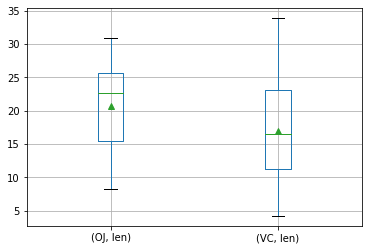

In [31]:
# Multiple Boxplots.
grouped.boxplot(subplots=False,showmeans=True)

In [21]:
# Group by category.
x_vc=df[df['supp']=='VC']['len']
x_oj=df[df['supp']=='OJ']['len']

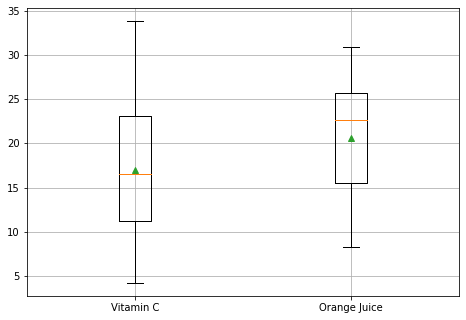

In [30]:
# Multiple Boxplots.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.grid(True)
ax.boxplot([x_vc,x_oj],showmeans=True)
ax.set_xticklabels(['Vitamin C','Orange Juice'])
plt.show()

In [33]:
# ANOVA.
test_stat,p_value=st.f_oneway(x_vc,x_oj)
print("Test statistic  : ",test_stat )
print("p-value         : " ,p_value )

Test statistic  :  3.6682525410709697
p-value         :  0.060393371224128745


small probability (6%) of having these observations in the case of equal population means of tooth length for both orange juice and vitamin c consumers

2). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'dose' variable. <br>
Summarize the result.

In [34]:
# Categories of 'dose'. 
df.dose.unique()

array([0.5, 1. , 2. ])

In [37]:
# Group by category.
x_half=df[df.dose==0.5]['len']
x_one=df[df.dose==1]['len']
x_two=df[df.dose==2]['len']

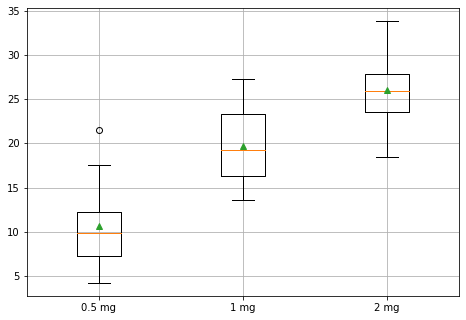

In [38]:
# Multiple Boxplots.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.grid(True)
ax.boxplot([x_half,x_one,x_two],showmeans=True)
ax.set_xticklabels(['0.5 mg','1 mg','2 mg'])
plt.show()

we can see a correlation between dose of vitamin C and tooth length. It means that legth means for the three populations (0.5,1,2) should not have the same mean

In [39]:
# ANOVA.
test_stat,p_value=st.f_oneway(x_half,x_one,x_two)
print("Test statistic  : ",test_stat )
print("p-value         : " ,p_value )

Test statistic  :  67.41573785674247
p-value         :  9.532727011699946e-16


Indeed, as expected, we find a very small p_value meaning that we should reject the null hypothesis of equal population means